In [1]:
 %matplotlib inline

In [2]:
import pandas as pd

#df = pd.read_excel('Satellite-MySatellite-To-Place-Oslo_AER-ISO.xlsx')
df = pd.read_csv('Satellite-MySatellite-To-Place-Oslo_AER-ISO.csv')
# With a Sheet Name
# df = pd.read_excel(io='graph.xlsx', sheet_name = 0)

df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km)
0,2022-12-21T16:48:10.509,24.816,0.000,2354.695764
1,2022-12-21T16:49:10.000,31.063,3.608,1984.688010
2,2022-12-21T16:50:10.000,40.089,7.748,1641.668084
3,2022-12-21T16:51:10.000,53.544,12.262,1354.370034
4,2022-12-21T16:52:10.000,73.163,16.098,1166.661987
...,...,...,...,...
71,2022-12-22T06:30:57.000,274.862,5.409,1814.968100
72,2022-12-22T06:31:57.000,289.546,5.328,1825.185258
73,2022-12-22T06:32:57.000,303.289,4.099,1935.102660
74,2022-12-22T06:33:57.000,315.035,2.094,2128.755379


In [3]:
df['Time (ISO-YMD)'] = pd.to_datetime(df['Time (ISO-YMD)'])  # convert ISO time to pandas datetime
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km)
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987
...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379


In [4]:
df['time'] = df['Time (ISO-YMD)'].dt.time           # make a pure time column
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764,16:48:10.509000
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010,16:49:10
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084,16:50:10
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034,16:51:10
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987,16:52:10
...,...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100,06:30:57
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258,06:31:57
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660,06:32:57
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379,06:33:57


In [5]:
df['delta_s [km]'] = df['Range (km)'].diff()        # calculate delta s in km
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km]
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764,16:48:10.509000,NaN
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010,16:49:10,-370.007754
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084,16:50:10,-343.019926
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034,16:51:10,-287.298050
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987,16:52:10,-187.708047
...,...,...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100,06:30:57,-91.287637
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258,06:31:57,10.217158
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660,06:32:57,109.917402
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379,06:33:57,193.652719


In [6]:
df['delta_t [s]'] = df['Time (ISO-YMD)'].diff().dt.total_seconds()   # calculate delta t in seconds
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s]
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764,16:48:10.509000,NaN,NaN
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010,16:49:10,-370.007754,59.491
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084,16:50:10,-343.019926,60.000
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034,16:51:10,-287.298050,60.000
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987,16:52:10,-187.708047,60.000
...,...,...,...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100,06:30:57,-91.287637,60.000
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258,06:31:57,10.217158,60.000
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660,06:32:57,109.917402,60.000
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379,06:33:57,193.652719,60.000


The received frequency:

$$
f = \left( 1 + \frac{\Delta v}{c} \right)  f_0
$$

where $\Delta v = v_r - v_s$ is the relative motion between the satellite and the receiver.  Since the ground station is not moving  $\Delta v = - v_s$

$f_0$ is the carrier frequency, $c$ is the speed of light, 3·10⁸ m/s

The Doppler shift can be expressed as:

$$
f - f_0 = \Delta f = \frac{\Delta v}{c} f_0
$$

In [7]:
df['delta_v [km/s]'] = - df['delta_s [km]'] / df['delta_t [s]']    # delta v = - delta s / delta t
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s],delta_v [km/s]
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764,16:48:10.509000,NaN,NaN,NaN
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010,16:49:10,-370.007754,59.491,6.219558
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084,16:50:10,-343.019926,60.000,5.716999
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034,16:51:10,-287.298050,60.000,4.788301
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987,16:52:10,-187.708047,60.000,3.128467
...,...,...,...,...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100,06:30:57,-91.287637,60.000,1.521461
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258,06:31:57,10.217158,60.000,-0.170286
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660,06:32:57,109.917402,60.000,-1.831957
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379,06:33:57,193.652719,60.000,-3.227545


In [8]:
f0 = 435.455e6  # downlink frequecy 435.455 MHz
c = 3e8         # speed of light 300,000,000 [m/s]
f0, c

(435455000.0, 300000000.0)

In [9]:
df['delta_f [kHz]'] = df['delta_v [km/s]'] / c * f0     # calculate delta f in kHz
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s],delta_v [km/s],delta_f [kHz]
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764,16:48:10.509000,NaN,NaN,NaN,NaN
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010,16:49:10,-370.007754,59.491,6.219558,9.027793
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084,16:50:10,-343.019926,60.000,5.716999,8.298319
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034,16:51:10,-287.298050,60.000,4.788301,6.950298
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987,16:52:10,-187.708047,60.000,3.128467,4.541023
...,...,...,...,...,...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100,06:30:57,-91.287637,60.000,1.521461,2.208425
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258,06:31:57,10.217158,60.000,-0.170286,-0.247173
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660,06:32:57,109.917402,60.000,-1.831957,-2.659116
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379,06:33:57,193.652719,60.000,-3.227545,-4.684836


The free space loss can be expressed as:

$$
FSPL = \left(\frac{4\pi d}{\lambda}\right)^2
$$

The free space loss in deciBel:

$$
FSPL [dB] = 10·log \left(\frac{4\pi d}{\lambda}\right)^2
$$

$$
FSPL [dB] = 20·log \left(\frac{4\pi d}{\lambda}\right) = 20 · \left( log(4\pi) + log(\frac{d}{\lambda}) \right)
$$

$$
FSPL [dB] = 22 + 20·log \left(\frac{d}{\lambda}\right)
$$



In [10]:
λ = c / f0
λ

0.6889345626987863

In [11]:
from math import log10, pi
# lg = log10
# df['fspl [dB]'] = 22 + 20*lg(df['Range (km)'] * 1000 / λ)

# TypeError: cannot convert the series to <class 'float'>

In [12]:
df['fspl'] = (4*pi*df['Range (km)']*1000/ λ)**2
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s],delta_v [km/s],delta_f [kHz],fspl
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764,16:48:10.509000,NaN,NaN,NaN,NaN,1.844732e+15
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010,16:49:10,-370.007754,59.491,6.219558,9.027793,1.310534e+15
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084,16:50:10,-343.019926,60.000,5.716999,8.298319,8.966738e+14
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034,16:51:10,-287.298050,60.000,4.788301,6.950298,6.102931e+14
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987,16:52:10,-187.708047,60.000,3.128467,4.541023,4.528495e+14
...,...,...,...,...,...,...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100,06:30:57,-91.287637,60.000,1.521461,2.208425,1.095978e+15
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258,06:31:57,10.217158,60.000,-0.170286,-0.247173,1.108352e+15
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660,06:32:57,109.917402,60.000,-1.831957,-2.659116,1.245867e+15
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379,06:33:57,193.652719,60.000,-3.227545,-4.684836,1.507701e+15


In [13]:
import numpy as np
df['fspl [dB]'] = 10 * np.log10(df['fspl'])
df

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s],delta_v [km/s],delta_f [kHz],fspl,fspl [dB]
0,2022-12-21 16:48:10.509,24.816,0.000,2354.695764,16:48:10.509000,NaN,NaN,NaN,NaN,1.844732e+15,152.659334
1,2022-12-21 16:49:10.000,31.063,3.608,1984.688010,16:49:10,-370.007754,59.491,6.219558,9.027793,1.310534e+15,151.174483
2,2022-12-21 16:50:10.000,40.089,7.748,1641.668084,16:50:10,-343.019926,60.000,5.716999,8.298319,8.966738e+14,149.526345
3,2022-12-21 16:51:10.000,53.544,12.262,1354.370034,16:51:10,-287.298050,60.000,4.788301,6.950298,6.102931e+14,147.855385
4,2022-12-21 16:52:10.000,73.163,16.098,1166.661987,16:52:10,-187.708047,60.000,3.128467,4.541023,4.528495e+14,146.559539
...,...,...,...,...,...,...,...,...,...,...,...
71,2022-12-22 06:30:57.000,274.862,5.409,1814.968100,06:30:57,-91.287637,60.000,1.521461,2.208425,1.095978e+15,150.398018
72,2022-12-22 06:31:57.000,289.546,5.328,1825.185258,06:31:57,10.217158,60.000,-0.170286,-0.247173,1.108352e+15,150.446777
73,2022-12-22 06:32:57.000,303.289,4.099,1935.102660,06:32:57,109.917402,60.000,-1.831957,-2.659116,1.245867e+15,150.954718
74,2022-12-22 06:33:57.000,315.035,2.094,2128.755379,06:33:57,193.652719,60.000,-3.227545,-4.684836,1.507701e+15,151.783153


When two consecutive rows have Elevation 0.0 degree it means that they belong to 2 different passes, we are going to set the **delta_f [kHz]** and **fspl [dB]** on the second row to NaN

In [14]:
#df['Elevation (deg)'] == 0
df[df['Elevation (deg)'] == 0]


,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s],delta_v [km/s],delta_f [kHz],fspl,fspl [dB]
0,2022-12-21 16:48:10.509,24.816,0.0,2354.695764,16:48:10.509000,NaN,NaN,NaN,NaN,1.844732e+15,152.659334
10,2022-12-21 16:57:29.252,155.053,0.0,2321.010529,16:57:29.252000,121.889898,19.252,-6.331285,-9.189966,1.792330e+15,152.534180
11,2022-12-21 18:19:53.464,12.510,0.0,2355.976502,18:19:53.464000,34.965973,4944.212,-0.007072,-0.010265,1.846740e+15,152.664057
22,2022-12-21 18:30:06.582,207.385,0.0,2321.324218,18:30:06.582000,97.959378,13.582,-7.212441,-10.468979,1.792815e+15,152.535354
23,2022-12-21 19:52:09.047,2.859,0.0,2356.380422,19:52:09.047000,35.056204,4922.465,-0.007122,-0.010337,1.847373e+15,152.665546
32,2022-12-21 20:00:17.485,257.812,0.0,2333.867576,20:00:17.485000,48.366008,8.485,-5.700178,-8.273903,1.812242e+15,152.582162
33,2022-12-21 21:25:20.976,346.186,0.0,2355.874203,21:25:20.976000,22.006627,5103.491,-0.004312,-0.006259,1.846579e+15,152.663680
36,2022-12-21 21:27:51.358,317.669,0.0,2351.543044,21:27:51.358000,43.069956,31.358,-1.373492,-1.993646,1.839796e+15,152.647696
37,2022-12-22 01:53:01.244,77.443,0.0,2341.804027,01:53:01.244000,-9.739017,15909.886,0.000612,0.000889,1.824588e+15,152.611649
44,2022-12-22 01:59:14.847,2.374,0.0,2356.393225,01:59:14.847000,59.650581,13.847,-4.307834,-6.252893,1.847393e+15,152.665593


In [15]:
df['eldiff'] = df['Elevation (deg)'].diff()    # creating eldiff - difference of Elevantion between 2 consecutive rows
df[df['Elevation (deg)'] == 0]

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s],delta_v [km/s],delta_f [kHz],fspl,fspl [dB],eldiff
0,2022-12-21 16:48:10.509,24.816,0.0,2354.695764,16:48:10.509000,NaN,NaN,NaN,NaN,1.844732e+15,152.659334,NaN
10,2022-12-21 16:57:29.252,155.053,0.0,2321.010529,16:57:29.252000,121.889898,19.252,-6.331285,-9.189966,1.792330e+15,152.534180,-1.139
11,2022-12-21 18:19:53.464,12.510,0.0,2355.976502,18:19:53.464000,34.965973,4944.212,-0.007072,-0.010265,1.846740e+15,152.664057,0.000
22,2022-12-21 18:30:06.582,207.385,0.0,2321.324218,18:30:06.582000,97.959378,13.582,-7.212441,-10.468979,1.792815e+15,152.535354,-0.909
23,2022-12-21 19:52:09.047,2.859,0.0,2356.380422,19:52:09.047000,35.056204,4922.465,-0.007122,-0.010337,1.847373e+15,152.665546,0.000
32,2022-12-21 20:00:17.485,257.812,0.0,2333.867576,20:00:17.485000,48.366008,8.485,-5.700178,-8.273903,1.812242e+15,152.582162,-0.444
33,2022-12-21 21:25:20.976,346.186,0.0,2355.874203,21:25:20.976000,22.006627,5103.491,-0.004312,-0.006259,1.846579e+15,152.663680,0.000
36,2022-12-21 21:27:51.358,317.669,0.0,2351.543044,21:27:51.358000,43.069956,31.358,-1.373492,-1.993646,1.839796e+15,152.647696,-0.400
37,2022-12-22 01:53:01.244,77.443,0.0,2341.804027,01:53:01.244000,-9.739017,15909.886,0.000612,0.000889,1.824588e+15,152.611649,0.000
44,2022-12-22 01:59:14.847,2.374,0.0,2356.393225,01:59:14.847000,59.650581,13.847,-4.307834,-6.252893,1.847393e+15,152.665593,-0.540


In [16]:
import numpy as np
df.loc[df['eldiff']==0, ['delta_f [kHz]', 'fspl', 'fspl [dB]']] = np.nan   # when eldiff == 0 set delta_f to NaN
df[df['Elevation (deg)'] == 0]

,Time (ISO-YMD),Azimuth (deg),Elevation (deg),Range (km),time,delta_s [km],delta_t [s],delta_v [km/s],delta_f [kHz],fspl,fspl [dB],eldiff
0,2022-12-21 16:48:10.509,24.816,0.0,2354.695764,16:48:10.509000,NaN,NaN,NaN,NaN,1.844732e+15,152.659334,NaN
10,2022-12-21 16:57:29.252,155.053,0.0,2321.010529,16:57:29.252000,121.889898,19.252,-6.331285,-9.189966,1.792330e+15,152.534180,-1.139
11,2022-12-21 18:19:53.464,12.510,0.0,2355.976502,18:19:53.464000,34.965973,4944.212,-0.007072,NaN,NaN,NaN,0.000
22,2022-12-21 18:30:06.582,207.385,0.0,2321.324218,18:30:06.582000,97.959378,13.582,-7.212441,-10.468979,1.792815e+15,152.535354,-0.909
23,2022-12-21 19:52:09.047,2.859,0.0,2356.380422,19:52:09.047000,35.056204,4922.465,-0.007122,NaN,NaN,NaN,0.000
32,2022-12-21 20:00:17.485,257.812,0.0,2333.867576,20:00:17.485000,48.366008,8.485,-5.700178,-8.273903,1.812242e+15,152.582162,-0.444
33,2022-12-21 21:25:20.976,346.186,0.0,2355.874203,21:25:20.976000,22.006627,5103.491,-0.004312,NaN,NaN,NaN,0.000
36,2022-12-21 21:27:51.358,317.669,0.0,2351.543044,21:27:51.358000,43.069956,31.358,-1.373492,-1.993646,1.839796e+15,152.647696,-0.400
37,2022-12-22 01:53:01.244,77.443,0.0,2341.804027,01:53:01.244000,-9.739017,15909.886,0.000612,NaN,NaN,NaN,0.000
44,2022-12-22 01:59:14.847,2.374,0.0,2356.393225,01:59:14.847000,59.650581,13.847,-4.307834,-6.252893,1.847393e+15,152.665593,-0.540


In [17]:
df.drop('eldiff',axis=1,inplace=True)  # we don't need eldiff anymore

Try to plot the Doppler shift

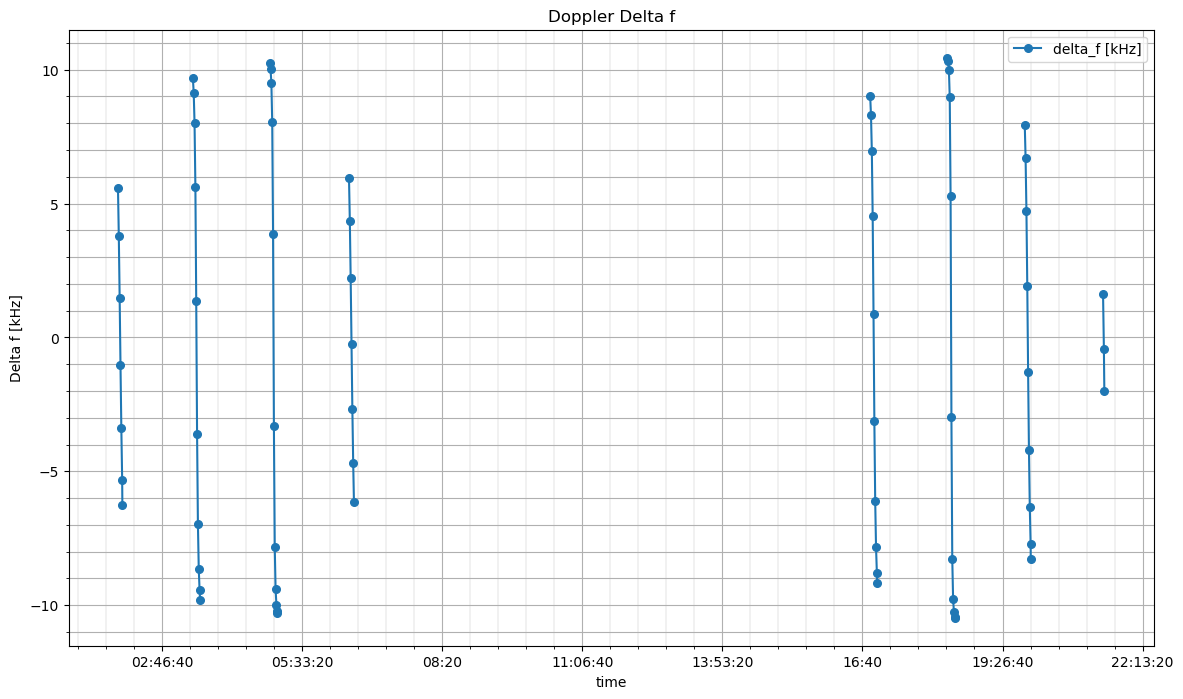

In [18]:
ax = df.plot.line(x="time", y=["delta_f [kHz]"],  grid=True,  marker='.', figsize=(14,8), markersize=11, title='Doppler Delta f')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Delta f [kHz]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

The above plot looks ok, but passes 1..4 are on the right side and passes 5..8 are on the left side because observation period starts at 11:00 AM but we are plotting against time only.

Try to plot the 'fspl [dB]'

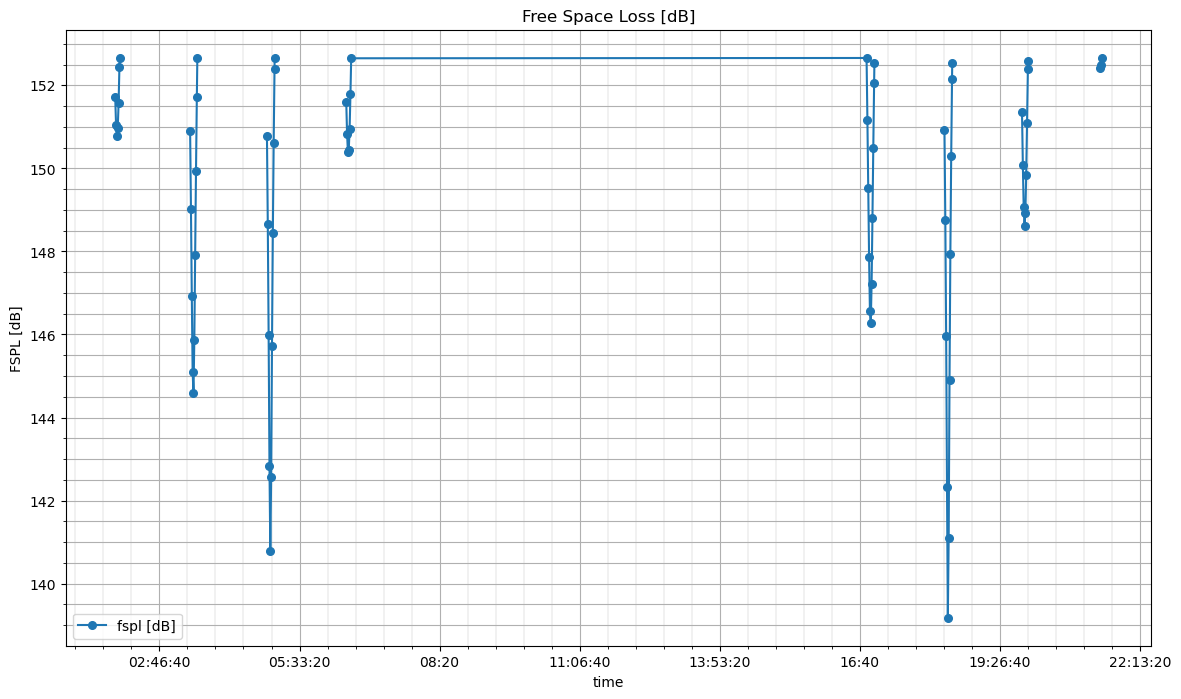

In [19]:
ax = df.plot.line(x="time", y=["fspl [dB]"],  grid=True,  marker='.', figsize=(14,8), markersize=11, title='Free Space Loss [dB]')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('FSPL [dB]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

The above plot looks ok, but passes 1..4 are on the right side and passes 5..8 are on the left side because observation period starts at 11:00 AM but we are plotting against time only.

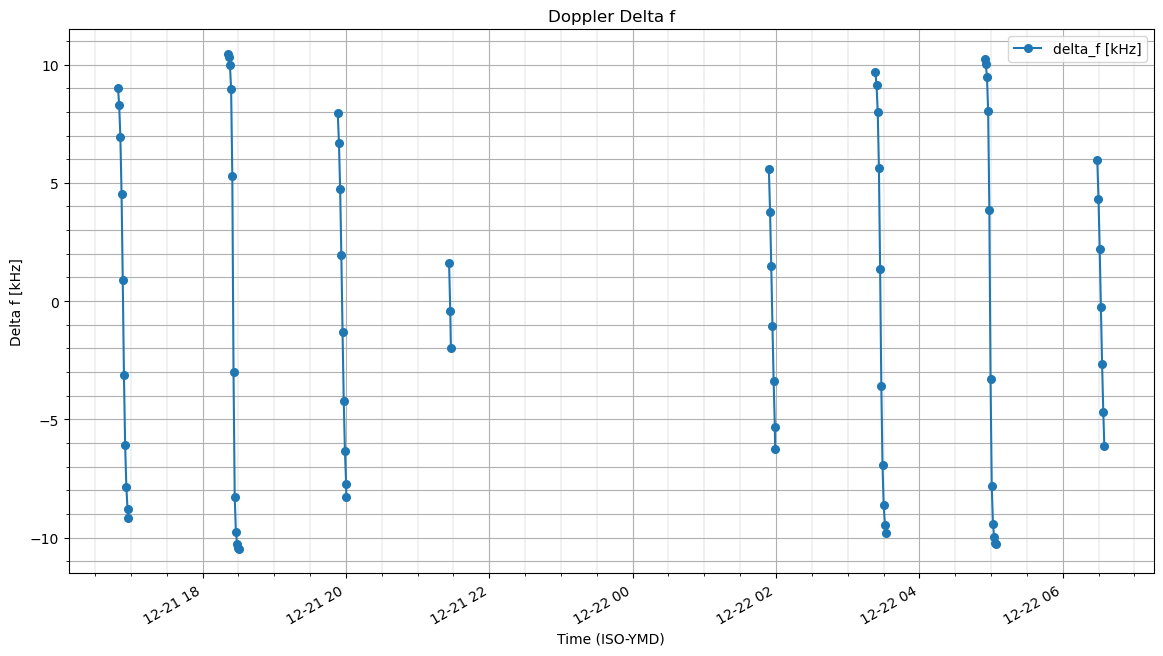

In [20]:
ax = df.plot.line(x="Time (ISO-YMD)", y=["delta_f [kHz]"],  grid=True,  marker='.', figsize=(14,8), markersize=11, title='Doppler Delta f')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Delta f [kHz]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

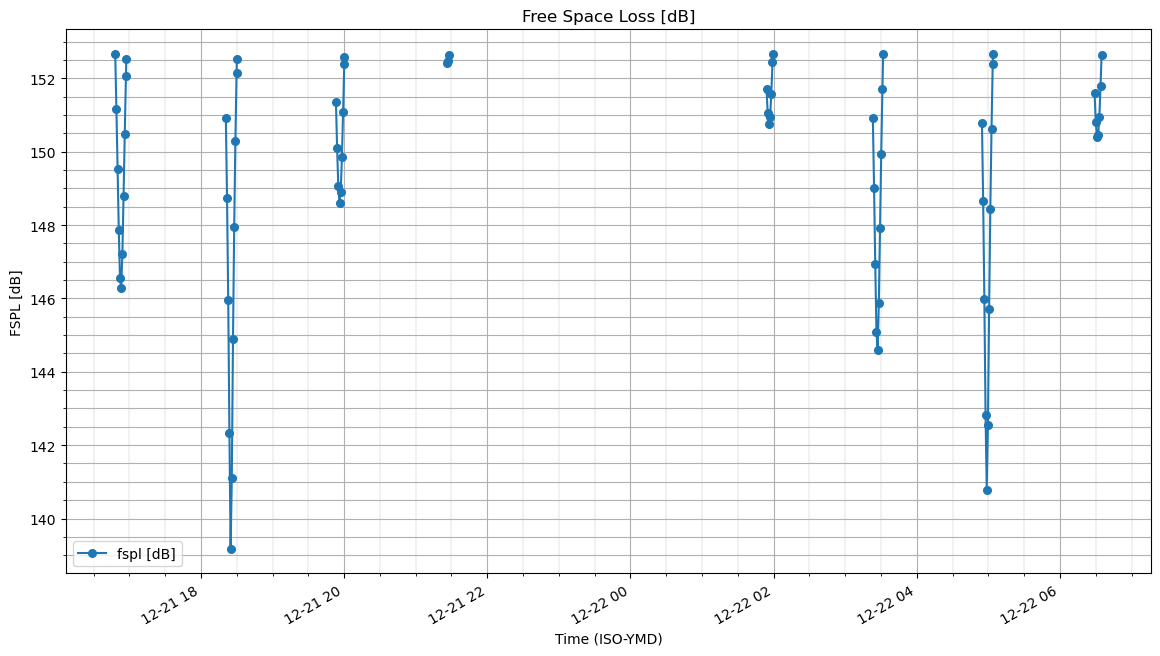

In [21]:
ax = df.plot.line(x="Time (ISO-YMD)", y=["fspl [dB]"],  grid=True,  marker='.', figsize=(14,8), markersize=11, title='Free Space Loss [dB]')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('FSPL [dB]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

Now the order of the passes is ok, but on the x axes we have only date and hour.  Let's do one more experiment, write df to excel and read it back:

In [22]:
df.to_excel('graph.xlsx', index=False)

In [23]:
df = pd.read_excel('graph.xlsx')

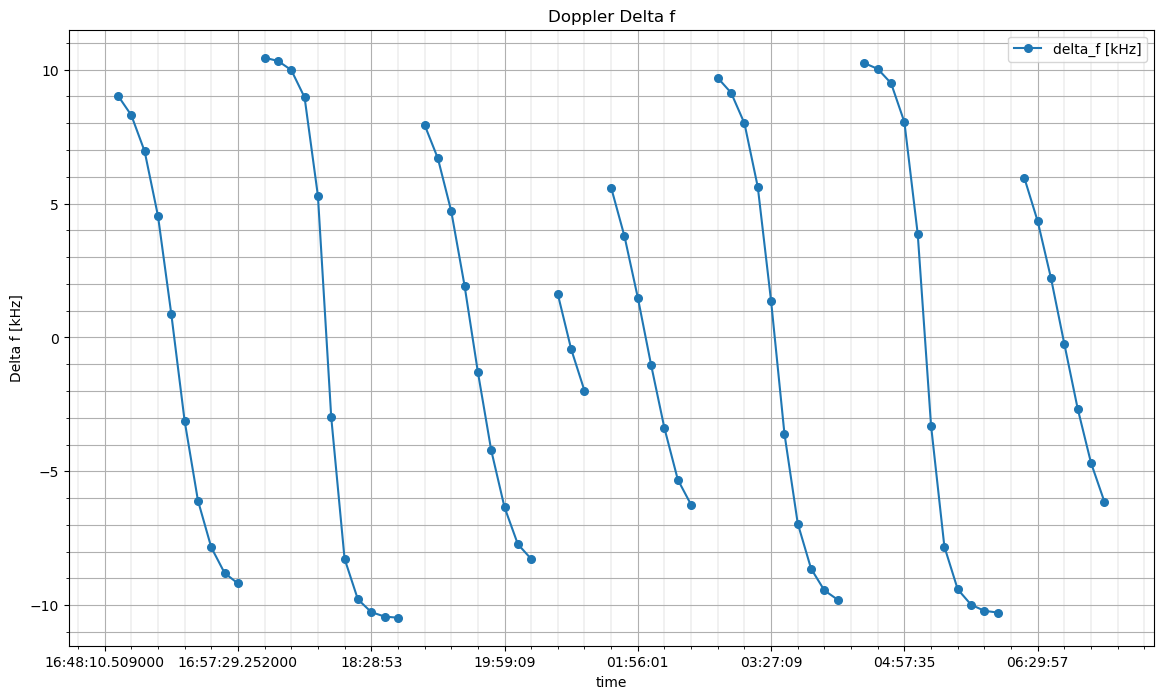

In [24]:
ax = df.plot.line(x="time", y=["delta_f [kHz]"],  grid=True,  marker='.', figsize=(14,8), markersize=11, title='Doppler Delta f')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Delta f [kHz]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

After writing to excel and reading it back the plot against the time get stretched out.  I don't know why, bot it looks nice :-)

Now plotting the first pass only together with the elevation:

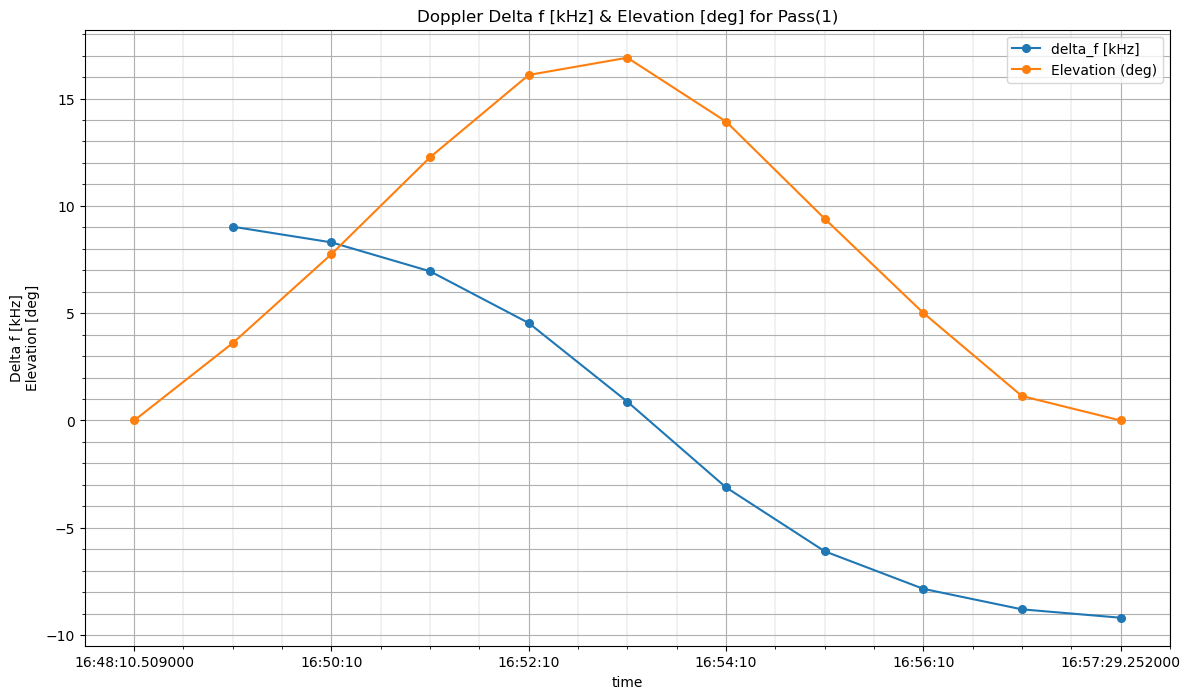

In [25]:
ax = df.iloc[:11].plot.line(x="time", y=[ "delta_f [kHz]", 'Elevation (deg)'],  grid=True,  marker='.', figsize=(14,8), markersize=11, title='Doppler Delta f [kHz] & Elevation [deg] for Pass(1)')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('Delta f [kHz]\nElevation [deg]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

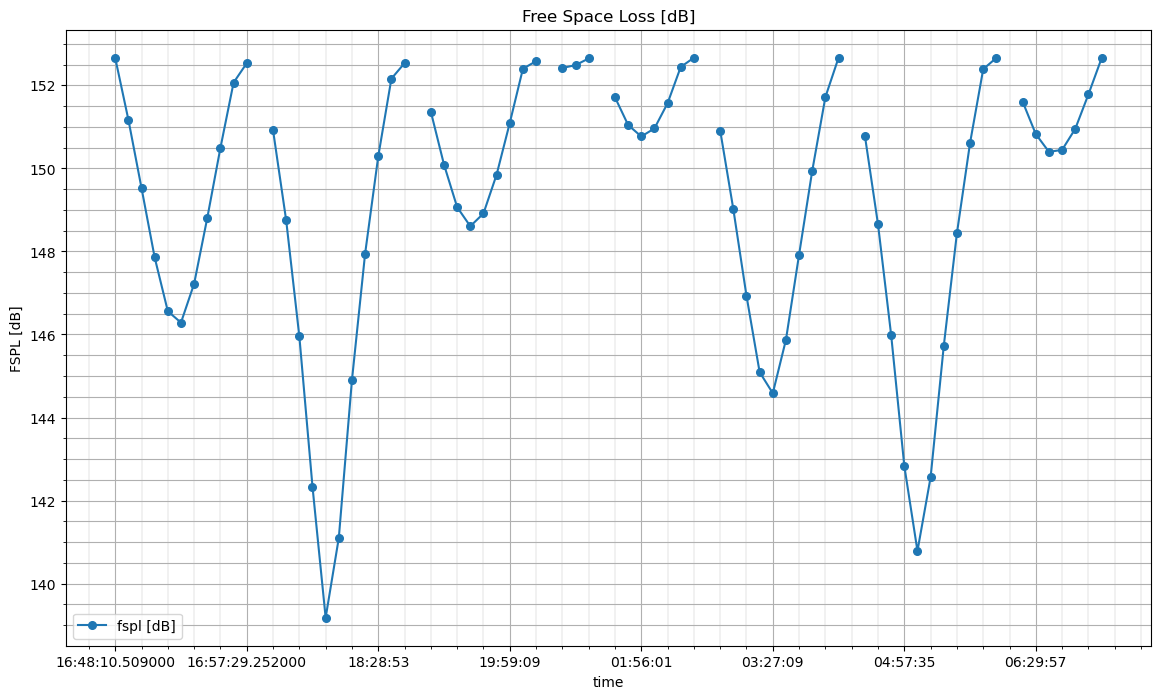

In [26]:
ax = df.plot.line(x="time", y=["fspl [dB]"],  grid=True,  marker='.', figsize=(14,8), markersize=11, title='Free Space Loss [dB]')
ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
ax.set_ylabel('FSPL [dB]')
ax.grid('on', which='minor', axis='y' )
ax.minorticks_on()

... and a few more experiments below, kept only for future reference

In [27]:
from typing import List, Union

import matplotlib.axes
import pandas as pd

def plot_multi(
    data: pd.DataFrame,
    x: Union[str, None] = None,
    y: Union[List[str], None] = None,
    spacing: float = 0.1,
    **kwargs
) -> matplotlib.axes.Axes:
    """Plot multiple Y axes on the same chart with same x axis.

    Args:
        data: dataframe which contains x and y columns
        x: column to use as x axis. If None, use index.
        y: list of columns to use as Y axes. If None, all columns are used
            except x column.
        spacing: spacing between the plots
        **kwargs: keyword arguments to pass to data.plot()

    Returns:
        a matplotlib.axes.Axes object returned from data.plot()

    Example:
    >>> plot_multi(df, figsize=(22, 10))
    >>> plot_multi(df, x='time', figsize=(22, 10))
    >>> plot_multi(df, y='price qty value'.split(), figsize=(22, 10))
    >>> plot_multi(df, x='time', y='price qty value'.split(), figsize=(22, 10))
    >>> plot_multi(df[['time price qty'.split()]], x='time', figsize=(22, 10))

    See Also:
        This code is mentioned in https://stackoverflow.com/q/11640243/2593810
    """
    from pandas.plotting._matplotlib.style import get_standard_colors

    # Get default color style from pandas - can be changed to any other color list
    if y is None:
        y = data.columns

    # remove x_col from y_cols
    if x:
        y = [col for col in y if col != x]

    if len(y) == 0:
        return
    colors = get_standard_colors(num_colors=len(y))

    if "legend" not in kwargs:
        kwargs["legend"] = False  # prevent multiple legends

    # First axis
    ax = data.plot(x=x, y=y[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=y[0])
    lines, labels = ax.get_legend_handles_labels()

    for i in range(1, len(y)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines["right"].set_position(("axes", 1 + spacing * (i - 1)))
        data.plot(
            ax=ax_new, x=x, y=y[i], color=colors[i % len(colors)], **kwargs
        )
        ax_new.set_ylabel(ylabel=y[i])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    
    ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
    ax.grid('on', which='minor', axis='y' )
    ax.minorticks_on()

    return ax

<AxesSubplot:xlabel='time', ylabel='delta_f [kHz]'>

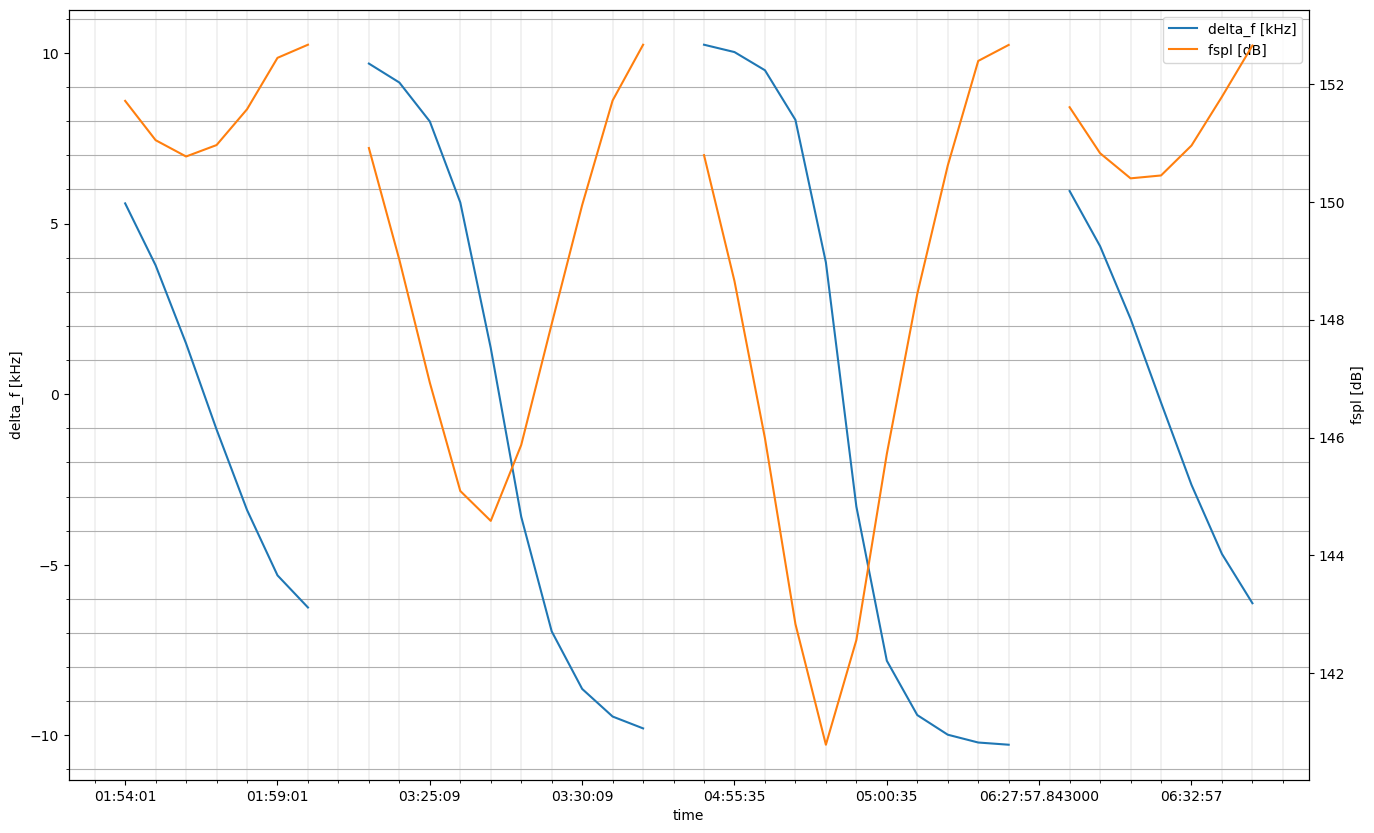

In [28]:
plot_multi(df.iloc[38:], x='time', y=["delta_f [kHz]", 'fspl [dB]'], figsize=(16, 10))

<AxesSubplot:title={'center':'FSPL [dB] and Elevation (deg) for the 2nd Pass of the Satellite'}, xlabel='time', ylabel='fspl [dB]'>

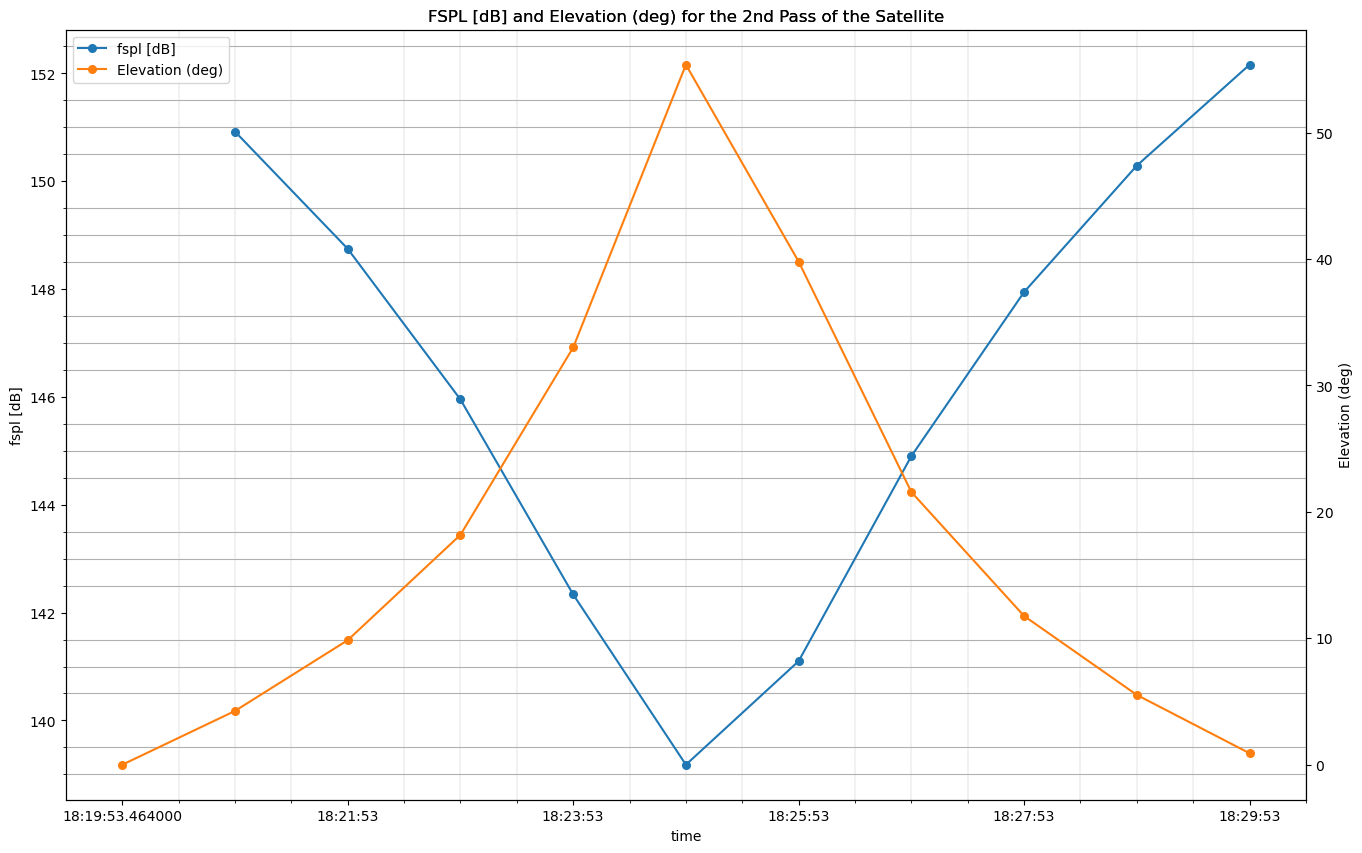

In [29]:
plot_multi(df.iloc[11:22], x='time', y=["fspl [dB]", 'Elevation (deg)'], marker='.', markersize=11, figsize=(16, 10), title='FSPL [dB] and Elevation (deg) for the 2nd Pass of the Satellite')

In [30]:
df['fspl [dB]'].min(), df['fspl [dB]'].max()

(139.1785992916328, 152.6655931258817)